<a href="https://colab.research.google.com/github/erfannayeb/Plate-Detector/blob/main/plate_OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt install poppler-utils
!apt install tesseract-ocr -q
!pip install -q pytesseract
!pip install -q googletrans==3.1.0a0
!pip install -q pdf2image
!pip install easyocr
!pip install paddlepaddle
!pip install paddleocr
%pip install ultralytics

import ultralytics
import torch
import os
import re
import cv2
import argparse
import imutils
import random
import pytesseract
import easyocr
import nltk
import pandas as pd
import io
import numpy as np
from PIL import Image
from paddleocr import PaddleOCR
from pytesseract import Output
from google.colab.patches import cv2_imshow
from ultralytics import YOLO

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
poppler-utils is already the newest version (22.02.0-2ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
Reading package lists...
Building dependency tree...
Reading state information...
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 MB 7.2 MB/s eta 0:00:00


### **Model**

In [ ]:
model= YOLO('/content/drive/MyDrive/plate/yolo/best.pt')
model.conf = 0.60

## **Image**

In [ ]:
!rm -r runs/

# Specify the directory where your images are located
image_directory = '/content/drive/MyDrive/plate/yolo/training/images/train/'

# List all files in the specified directory
image_files = os.listdir(image_directory)

# Filter the list to include only image files (e.g., .jpg, .png, .jpeg, .gif, etc.)
image_files = [f for f in image_files if f.lower().endswith(('.jpg', '.png', '.jpeg', '.gif'))]

# Check if there are at least 10 image files in the directory
if len(image_files) < 10:
    print("There are not enough images in the directory.")
else:
    # Select 20 random images
    random_images = random.sample(image_files, 20)

    # Print the selected image filenames
    print("Selected random images:")
    for image in random_images:
        print(image)

    # If you want to store the full paths to the selected images, use this instead:
    images_list = [os.path.join(image_directory, image) for image in random_images]

    # Now, the 'image_list' variable contains the selected image filenames or paths as a Python list.

print(images_list)
results = model(images_list, save_crop = True, box = True)  # inference


Selected random images:
N15.jpeg
N143.jpeg
N80.jpeg
N164.jpeg
N79.jpeg
N116.jpeg
N139.jpeg
N108.jpeg
N50.jpeg
N150.jpeg
N31.jpeg
N92.jpeg
N128.jpeg
N43.jpeg
N165.jpeg
N149.jpeg
N89.jpeg
N24.jpeg
N126.jpeg
N129.jpeg
['/content/drive/MyDrive/plate/yolo/training/images/train/N15.jpeg', '/content/drive/MyDrive/plate/yolo/training/images/train/N143.jpeg', '/content/drive/MyDrive/plate/yolo/training/images/train/N80.jpeg', '/content/drive/MyDrive/plate/yolo/training/images/train/N164.jpeg', '/content/drive/MyDrive/plate/yolo/training/images/train/N79.jpeg', '/content/drive/MyDrive/plate/yolo/training/images/train/N116.jpeg', '/content/drive/MyDrive/plate/yolo/training/images/train/N139.jpeg', '/content/drive/MyDrive/plate/yolo/training/images/train/N108.jpeg', '/content/drive/MyDrive/plate/yolo/training/images/train/N50.jpeg', '/content/drive/MyDrive/plate/yolo/training/images/train/N150.jpeg', '/content/drive/MyDrive/plate/yolo/training/images/train/N31.jpeg', '/content/drive/MyDrive/plate/


0: 1024x1024 1 number_plate, 1: 1024x1024 1 number_plate, 2: 1024x1024 1 number_plate, 3: 1024x1024 1 number_plate, 4: 1024x1024 1 number_plate, 5: 1024x1024 1 number_plate, 6: 1024x1024 1 number_plate, 7: 1024x1024 1 number_plate, 8: 1024x1024 2 number_plates, 9: 1024x1024 1 number_plate, 10: 1024x1024 1 number_plate, 11: 1024x1024 4 number_plates, 12: 1024x1024 1 number_plate, 13: 1024x1024 1 number_plate, 14: 1024x1024 1 number_plate, 15: 1024x1024 1 number_plate, 16: 1024x1024 1 number_plate, 17: 1024x1024 1 number_plate, 18: 1024x1024 1 number_plate, 19: 1024x1024 1 number_plate, 21106.3ms
Speed: 31.1ms preprocess, 1055.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)
Results saved to runs/detect/predict


In [ ]:
detected_images_dir_Plate = '/content/runs/detect/predict/crops/number_plate/'
detected_images_list_Plate = [os.path.join(detected_images_dir_Plate , _file) for _file in os.listdir(detected_images_dir_Plate )]

### **Preprocess**

[2023/11/05 14:27:29] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/ch/ch_PP-OCRv4_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/ch/ch_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='

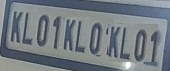

[2023/11/05 14:27:30] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.02412128448486328
[2023/11/05 14:27:30] ppocr DEBUG: cls num  : 1, elapsed : 0.017643451690673828
[2023/11/05 14:27:30] ppocr DEBUG: rec_res num  : 1, elapsed : 0.14858675003051758
EasyOCR License Plate Text: UKLOIKLOKLO
Pytesseract License Plate Text: COT
PaddleOCR License Plate Text: KL01KL0KL01



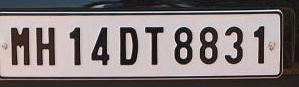

[2023/11/05 14:27:31] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.04185223579406738
[2023/11/05 14:27:31] ppocr DEBUG: cls num  : 1, elapsed : 0.01225137710571289
[2023/11/05 14:27:31] ppocr DEBUG: rec_res num  : 1, elapsed : 0.13275527954101562
EasyOCR License Plate Text: HHI4DT8831
Pytesseract License Plate Text: NH14078831
PaddleOCR License Plate Text: MH14DT8831



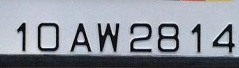

[2023/11/05 14:27:31] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.024025917053222656
[2023/11/05 14:27:31] ppocr DEBUG: cls num  : 1, elapsed : 0.012361764907836914
[2023/11/05 14:27:31] ppocr DEBUG: rec_res num  : 1, elapsed : 0.14081287384033203
EasyOCR License Plate Text: 1OA2814
Pytesseract License Plate Text: 10AW2814
PaddleOCR License Plate Text: 10AW2814



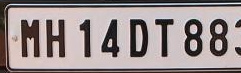

[2023/11/05 14:27:32] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.02728724479675293
[2023/11/05 14:27:32] ppocr DEBUG: cls num  : 1, elapsed : 0.012738943099975586
[2023/11/05 14:27:32] ppocr DEBUG: rec_res num  : 1, elapsed : 0.13770747184753418
EasyOCR License Plate Text: MH14T88
Pytesseract License Plate Text: MH140788
PaddleOCR License Plate Text: MH14DT88



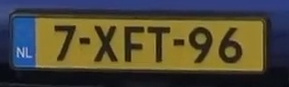

[2023/11/05 14:27:33] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.04216122627258301
[2023/11/05 14:27:33] ppocr DEBUG: cls num  : 2, elapsed : 0.03289318084716797
[2023/11/05 14:27:33] ppocr DEBUG: rec_res num  : 2, elapsed : 0.25670766830444336
EasyOCR License Plate Text: ZXFT96
Pytesseract License Plate Text: 
PaddleOCR License Plate Text: 7XFT96NL



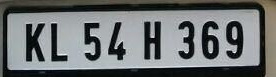

[2023/11/05 14:27:34] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.04695010185241699
[2023/11/05 14:27:34] ppocr DEBUG: cls num  : 1, elapsed : 0.019222259521484375
[2023/11/05 14:27:34] ppocr DEBUG: rec_res num  : 1, elapsed : 0.2307581901550293
EasyOCR License Plate Text: KL54H369
Pytesseract License Plate Text: KL54H369
PaddleOCR License Plate Text: KL54H369



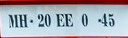

[2023/11/05 14:27:35] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.02348637580871582
[2023/11/05 14:27:35] ppocr DEBUG: cls num  : 1, elapsed : 0.023444414138793945
[2023/11/05 14:27:35] ppocr DEBUG: rec_res num  : 1, elapsed : 0.23681950569152832
EasyOCR License Plate Text: MH20FE045
Pytesseract License Plate Text: MH20EE045
PaddleOCR License Plate Text: MIH20EE045



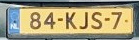

[2023/11/05 14:27:36] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.022145748138427734
[2023/11/05 14:27:36] ppocr DEBUG: cls num  : 1, elapsed : 0.019776344299316406
[2023/11/05 14:27:36] ppocr DEBUG: rec_res num  : 1, elapsed : 0.24849963188171387
EasyOCR License Plate Text: 84KJS7
Pytesseract License Plate Text: F84KJS7
PaddleOCR License Plate Text: 84KJS7



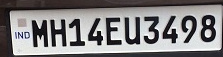

[2023/11/05 14:27:37] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.04027843475341797
[2023/11/05 14:27:37] ppocr DEBUG: cls num  : 1, elapsed : 0.020723819732666016
[2023/11/05 14:27:37] ppocr DEBUG: rec_res num  : 1, elapsed : 0.23712682723999023
EasyOCR License Plate Text: MH14EU3428
Pytesseract License Plate Text: 1MH14EU3498
PaddleOCR License Plate Text: MH14EU3498



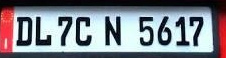

[2023/11/05 14:27:38] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.039243459701538086
[2023/11/05 14:27:38] ppocr DEBUG: cls num  : 1, elapsed : 0.020834922790527344
[2023/11/05 14:27:38] ppocr DEBUG: rec_res num  : 1, elapsed : 0.21825098991394043
EasyOCR License Plate Text: L7CN5617
Pytesseract License Plate Text: DL7CN5617
PaddleOCR License Plate Text: DL7CN5617



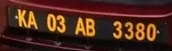

[2023/11/05 14:27:39] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.03381657600402832
[2023/11/05 14:27:39] ppocr DEBUG: cls num  : 1, elapsed : 0.02785634994506836
[2023/11/05 14:27:39] ppocr DEBUG: rec_res num  : 1, elapsed : 0.21191954612731934
EasyOCR License Plate Text: KA03AB
Pytesseract License Plate Text: 
PaddleOCR License Plate Text: KA03AB3380



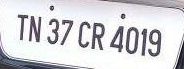

[2023/11/05 14:27:40] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.024721860885620117
[2023/11/05 14:27:40] ppocr DEBUG: cls num  : 1, elapsed : 0.021685361862182617
[2023/11/05 14:27:40] ppocr DEBUG: rec_res num  : 1, elapsed : 0.13179874420166016
EasyOCR License Plate Text: TN37CR4019
Pytesseract License Plate Text: 1N3724019TN37CR4019
PaddleOCR License Plate Text: TN37CR4019



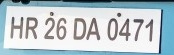

[2023/11/05 14:27:41] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.021869897842407227
[2023/11/05 14:27:41] ppocr DEBUG: cls num  : 1, elapsed : 0.017099380493164062
[2023/11/05 14:27:41] ppocr DEBUG: rec_res num  : 1, elapsed : 0.1345670223236084
EasyOCR License Plate Text: HR26DA0471
Pytesseract License Plate Text: HR26DA0471
PaddleOCR License Plate Text: HR26DA0471



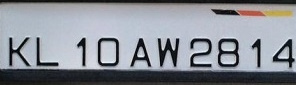

[2023/11/05 14:27:41] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.03922581672668457
[2023/11/05 14:27:41] ppocr DEBUG: cls num  : 1, elapsed : 0.01500844955444336
[2023/11/05 14:27:42] ppocr DEBUG: rec_res num  : 1, elapsed : 0.18506765365600586
EasyOCR License Plate Text: KL10AW2814
Pytesseract License Plate Text: KL10AW2814
PaddleOCR License Plate Text: KL10AW2814



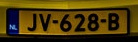

[2023/11/05 14:27:42] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.013526201248168945
[2023/11/05 14:27:42] ppocr DEBUG: cls num  : 1, elapsed : 0.014978408813476562
[2023/11/05 14:27:42] ppocr DEBUG: rec_res num  : 1, elapsed : 0.1357736587524414
EasyOCR License Plate Text: J6288
Pytesseract License Plate Text: 
PaddleOCR License Plate Text: JV628B



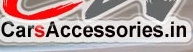

[2023/11/05 14:27:43] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.02187180519104004
[2023/11/05 14:27:43] ppocr DEBUG: cls num  : 1, elapsed : 0.016231536865234375
[2023/11/05 14:27:43] ppocr DEBUG: rec_res num  : 1, elapsed : 0.21291851997375488
EasyOCR License Plate Text: CA
Pytesseract License Plate Text: ACA
PaddleOCR License Plate Text: CA



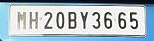

[2023/11/05 14:27:43] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.01667308807373047
[2023/11/05 14:27:43] ppocr DEBUG: cls num  : 1, elapsed : 0.018233299255371094
[2023/11/05 14:27:44] ppocr DEBUG: rec_res num  : 1, elapsed : 0.13683390617370605
EasyOCR License Plate Text: MHZOBY3665
Pytesseract License Plate Text: 
PaddleOCR License Plate Text: MH20BY3665



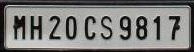

[2023/11/05 14:27:44] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.02386021614074707
[2023/11/05 14:27:44] ppocr DEBUG: cls num  : 1, elapsed : 0.020841360092163086
[2023/11/05 14:27:44] ppocr DEBUG: rec_res num  : 1, elapsed : 0.13253331184387207
EasyOCR License Plate Text: HH2O9817
Pytesseract License Plate Text: HH20CS9817
PaddleOCR License Plate Text: MH20CS9817



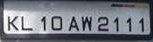

[2023/11/05 14:27:45] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.016288280487060547
[2023/11/05 14:27:45] ppocr DEBUG: cls num  : 1, elapsed : 0.020268917083740234
[2023/11/05 14:27:45] ppocr DEBUG: rec_res num  : 1, elapsed : 0.14786076545715332
EasyOCR License Plate Text: KL1QA211
Pytesseract License Plate Text: 
PaddleOCR License Plate Text: KL10AW2111



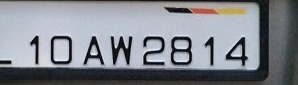

[2023/11/05 14:27:45] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.039632558822631836
[2023/11/05 14:27:45] ppocr DEBUG: cls num  : 1, elapsed : 0.015928983688354492
[2023/11/05 14:27:46] ppocr DEBUG: rec_res num  : 1, elapsed : 0.13898825645446777
EasyOCR License Plate Text: 10A2814
Pytesseract License Plate Text: 1OAN2514
PaddleOCR License Plate Text: 10AW2814



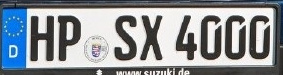

[2023/11/05 14:27:46] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.03179216384887695
[2023/11/05 14:27:46] ppocr DEBUG: cls num  : 1, elapsed : 0.015292882919311523
[2023/11/05 14:27:46] ppocr DEBUG: rec_res num  : 1, elapsed : 0.13836455345153809
EasyOCR License Plate Text: HPSX4
Pytesseract License Plate Text: HPSX4606
PaddleOCR License Plate Text: HPSX4000



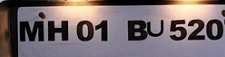

[2023/11/05 14:27:47] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.023754596710205078
[2023/11/05 14:27:47] ppocr DEBUG: cls num  : 1, elapsed : 0.016712665557861328
[2023/11/05 14:27:47] ppocr DEBUG: rec_res num  : 1, elapsed : 0.17151808738708496
EasyOCR License Plate Text: MH01
Pytesseract License Plate Text: ANVH01BU520
PaddleOCR License Plate Text: MH01BU520



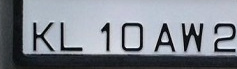

[2023/11/05 14:27:48] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.02548694610595703
[2023/11/05 14:27:48] ppocr DEBUG: cls num  : 1, elapsed : 0.016356945037841797
[2023/11/05 14:27:48] ppocr DEBUG: rec_res num  : 1, elapsed : 0.13610529899597168
EasyOCR License Plate Text: KL1AW2
Pytesseract License Plate Text: K10AW2
PaddleOCR License Plate Text: KL10AW2



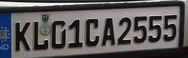

[2023/11/05 14:27:48] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.022509098052978516
[2023/11/05 14:27:48] ppocr DEBUG: cls num  : 1, elapsed : 0.01667499542236328
[2023/11/05 14:27:48] ppocr DEBUG: rec_res num  : 1, elapsed : 0.13501477241516113
EasyOCR License Plate Text: KLO1CA2555
Pytesseract License Plate Text: G1CA2555
PaddleOCR License Plate Text: KLC1CA2555



In [ ]:
from google.colab.patches import cv2_imshow

# Initialize EasyOCR reader
reader = easyocr.Reader(['en'])
# Initialize PaddleOCR reader
paddle_ocr = PaddleOCR(use_angle_cls=True, use_gpu=True)

# Function to perform OCR on a single image and display the images
def perform_ocr_on_image(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Calculate the angle required to make the text horizontal (set to 0 degrees)
    angle = 0

    # Rotate the image to make the text horizontal
    rotated_image = cv2.warpAffine(image, cv2.getRotationMatrix2D((image.shape[1] // 2, image.shape[0] // 2), angle, 1), (image.shape[1], image.shape[0]))

    cv2_imshow(rotated_image)

    # Perform OCR with EasyOCR on the preprocessed image
    easyocr_text = reader.readtext(rotated_image, detail=0)[0]

    # Perform OCR with PytesseractOCR on the preprocessed image
    pytesseract_text = pytesseract.image_to_string(rotated_image)

    # Perform OCR with PaddleOCR on the preprocessed image
    paddle_ocr_result = paddle_ocr.ocr(rotated_image)
    paddle_ocr_text = ''.join([line[1][0] for line in paddle_ocr_result[0]])

    # Remove noise and unwanted characters
    def clean_text(text):
        return re.sub(r'[^A-Z0-9]', '', text)

    easyocr_cleaned_text = clean_text(easyocr_text)
    pytesseract_cleaned_text = clean_text(pytesseract_text)
    paddle_ocr_cleaned_text = clean_text(paddle_ocr_text, det=True, rec=True)

    return easyocr_cleaned_text, pytesseract_cleaned_text, paddle_ocr_cleaned_text

# Perform OCR on each image in the list
for image_path in detected_images_list_Plate:
    easyocr_text, pytesseract_text, paddle_ocr_text = perform_ocr_on_image(image_path)
    print(f"EasyOCR License Plate Text: {easyocr_text}")
    print(f"Pytesseract License Plate Text: {pytesseract_text}")
    print(f"PaddleOCR License Plate Text: {paddle_ocr_text}")
    print()

### **Video**